# Explore here

EDA

In [58]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
#Save raw data
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [60]:
# Obtain dimensions
total_data.shape

(1338, 7)

In [62]:
# Obtain info about data type and null values.and
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns, which objective to predect is charges.
There are no null vulues.
There are 4 numeric values and 3 categoric values.

In [63]:
#Eliminate duplicate info
total_data = total_data.drop_duplicates()
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
total_data.shape

(1337, 7)

There was just 1 duplicated row.

Eliminate irrelevant info

In [66]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


Categoric Variables Analysis

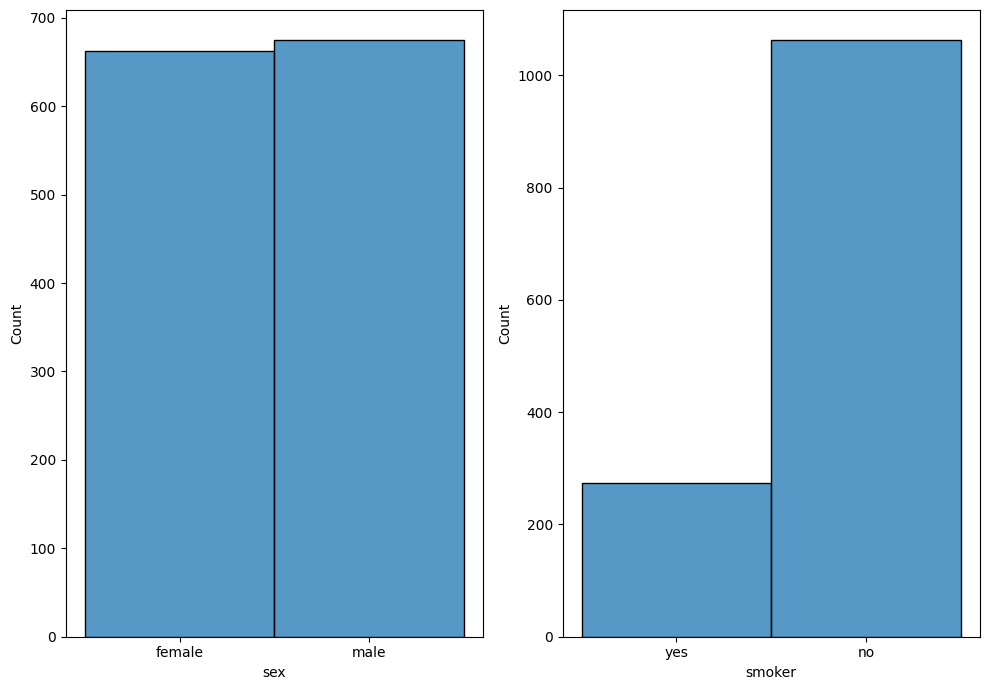

In [67]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 7))
sns.histplot(ax = axis[0], data = total_data, x = "sex")
sns.histplot(ax = axis[1], data = total_data, x = "smoker")

plt.tight_layout()
plt.show()

Numeric Variables Analysis

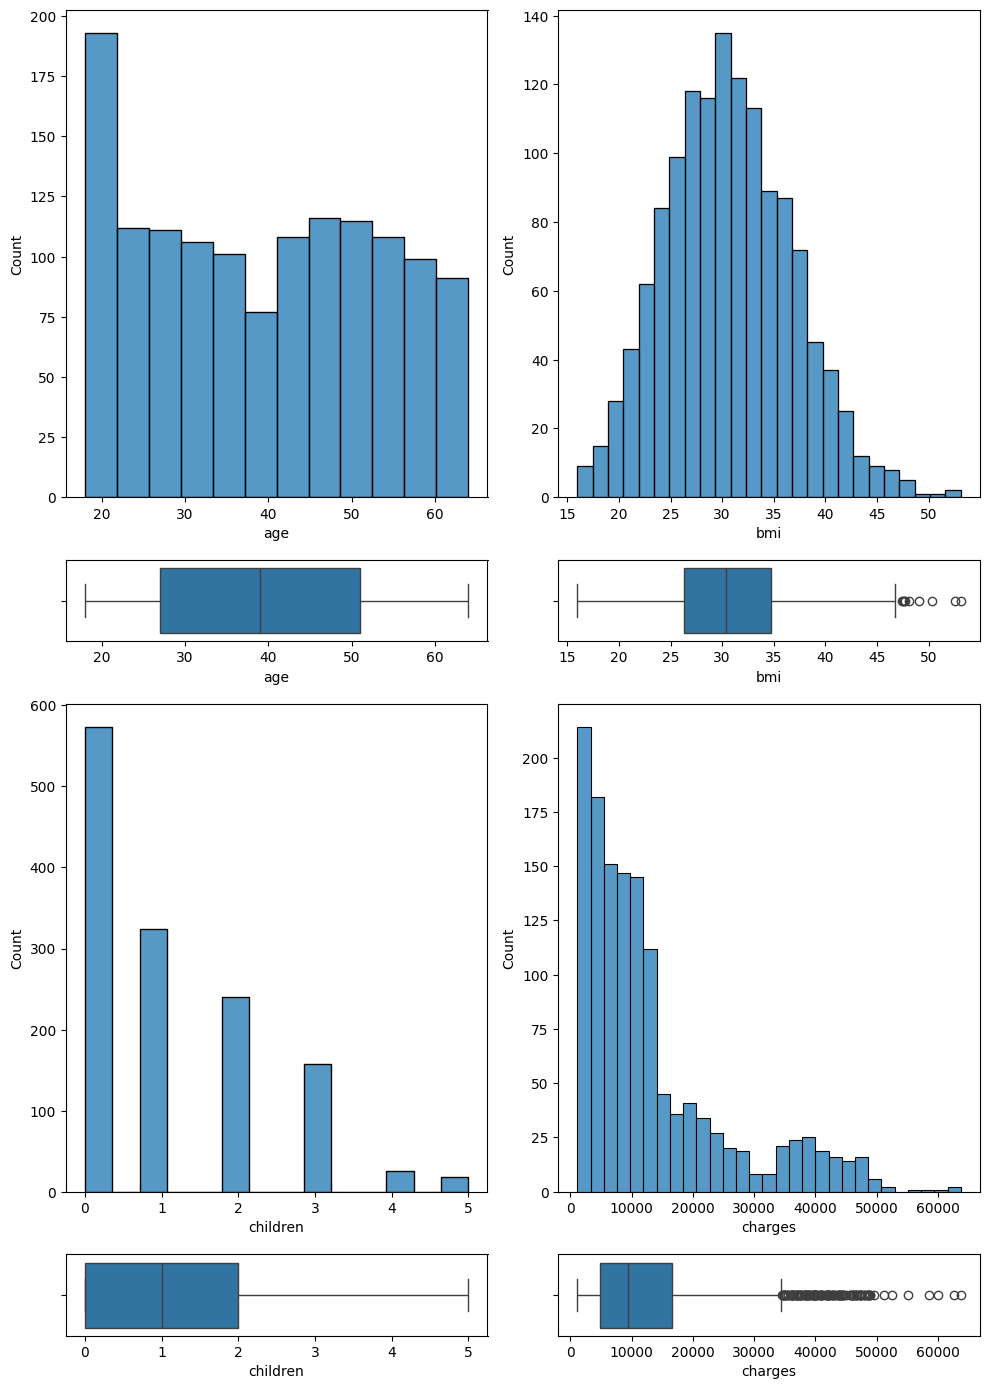

In [68]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")

sns.histplot(ax = axis[2,1], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

plt.tight_layout()
plt.show()

Numerical-Numerical Analysis

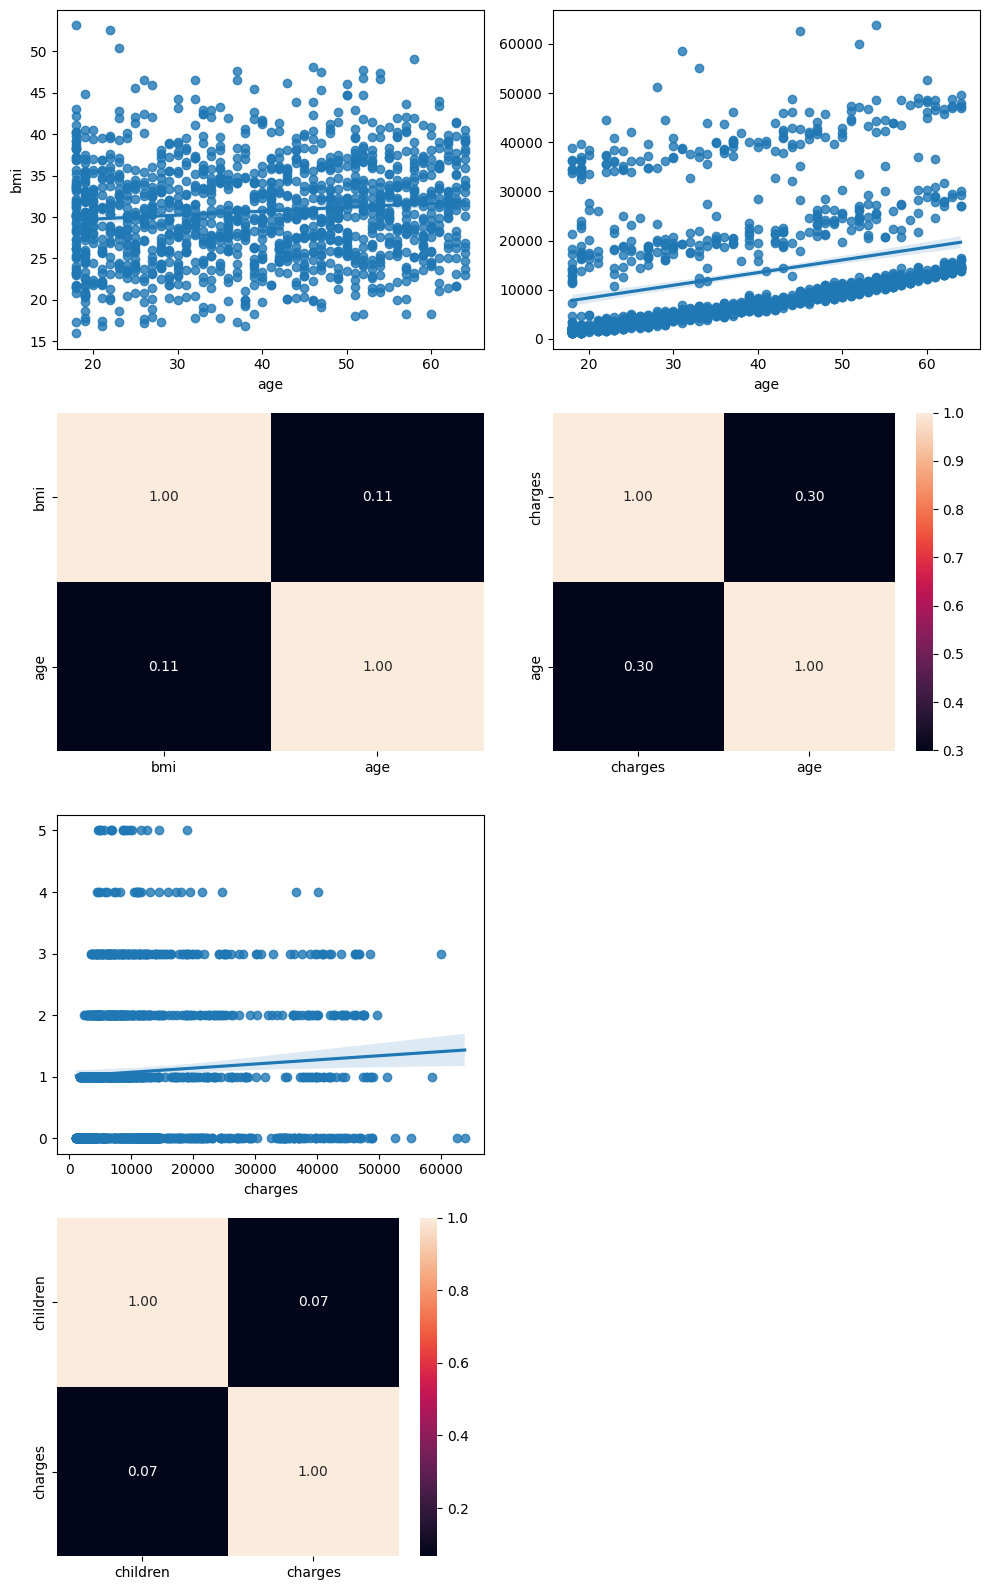

In [69]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "bmi")
sns.heatmap(total_data[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges").set(ylabel = None)
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "charges", y = "children").set(ylabel = None)
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

Categorical-Categorical Analysis

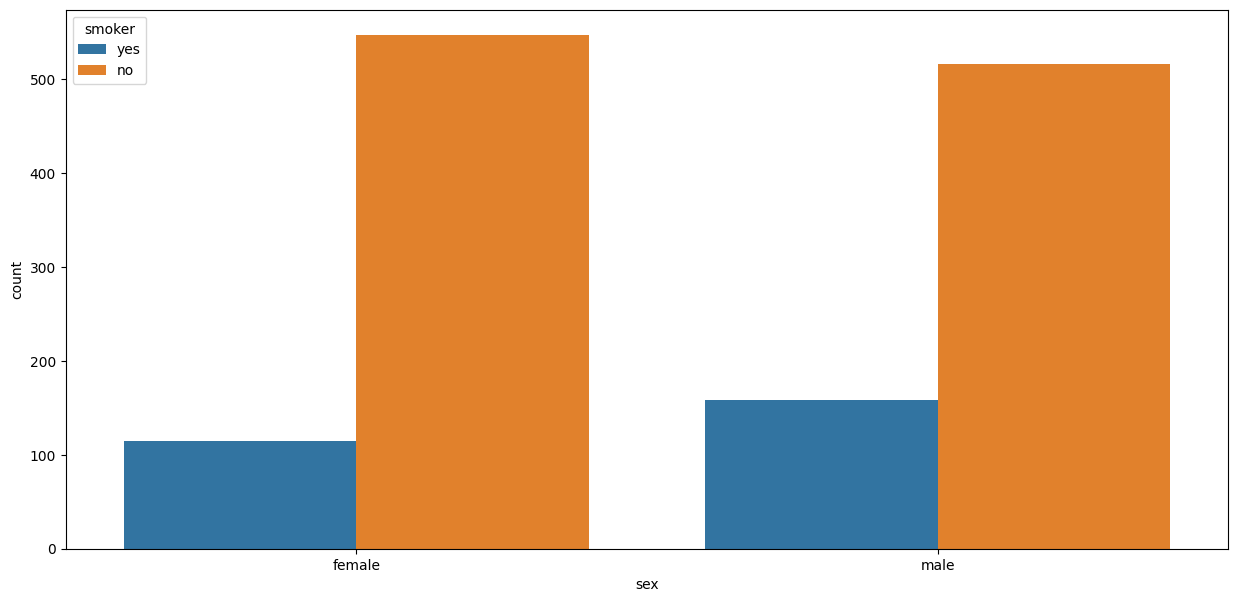

In [70]:
fig, axis = plt.subplots(figsize = (15, 7))

sns.countplot(data = total_data, x = "sex", hue = "smoker")
plt.show()

Numerical - Categorical Analysis

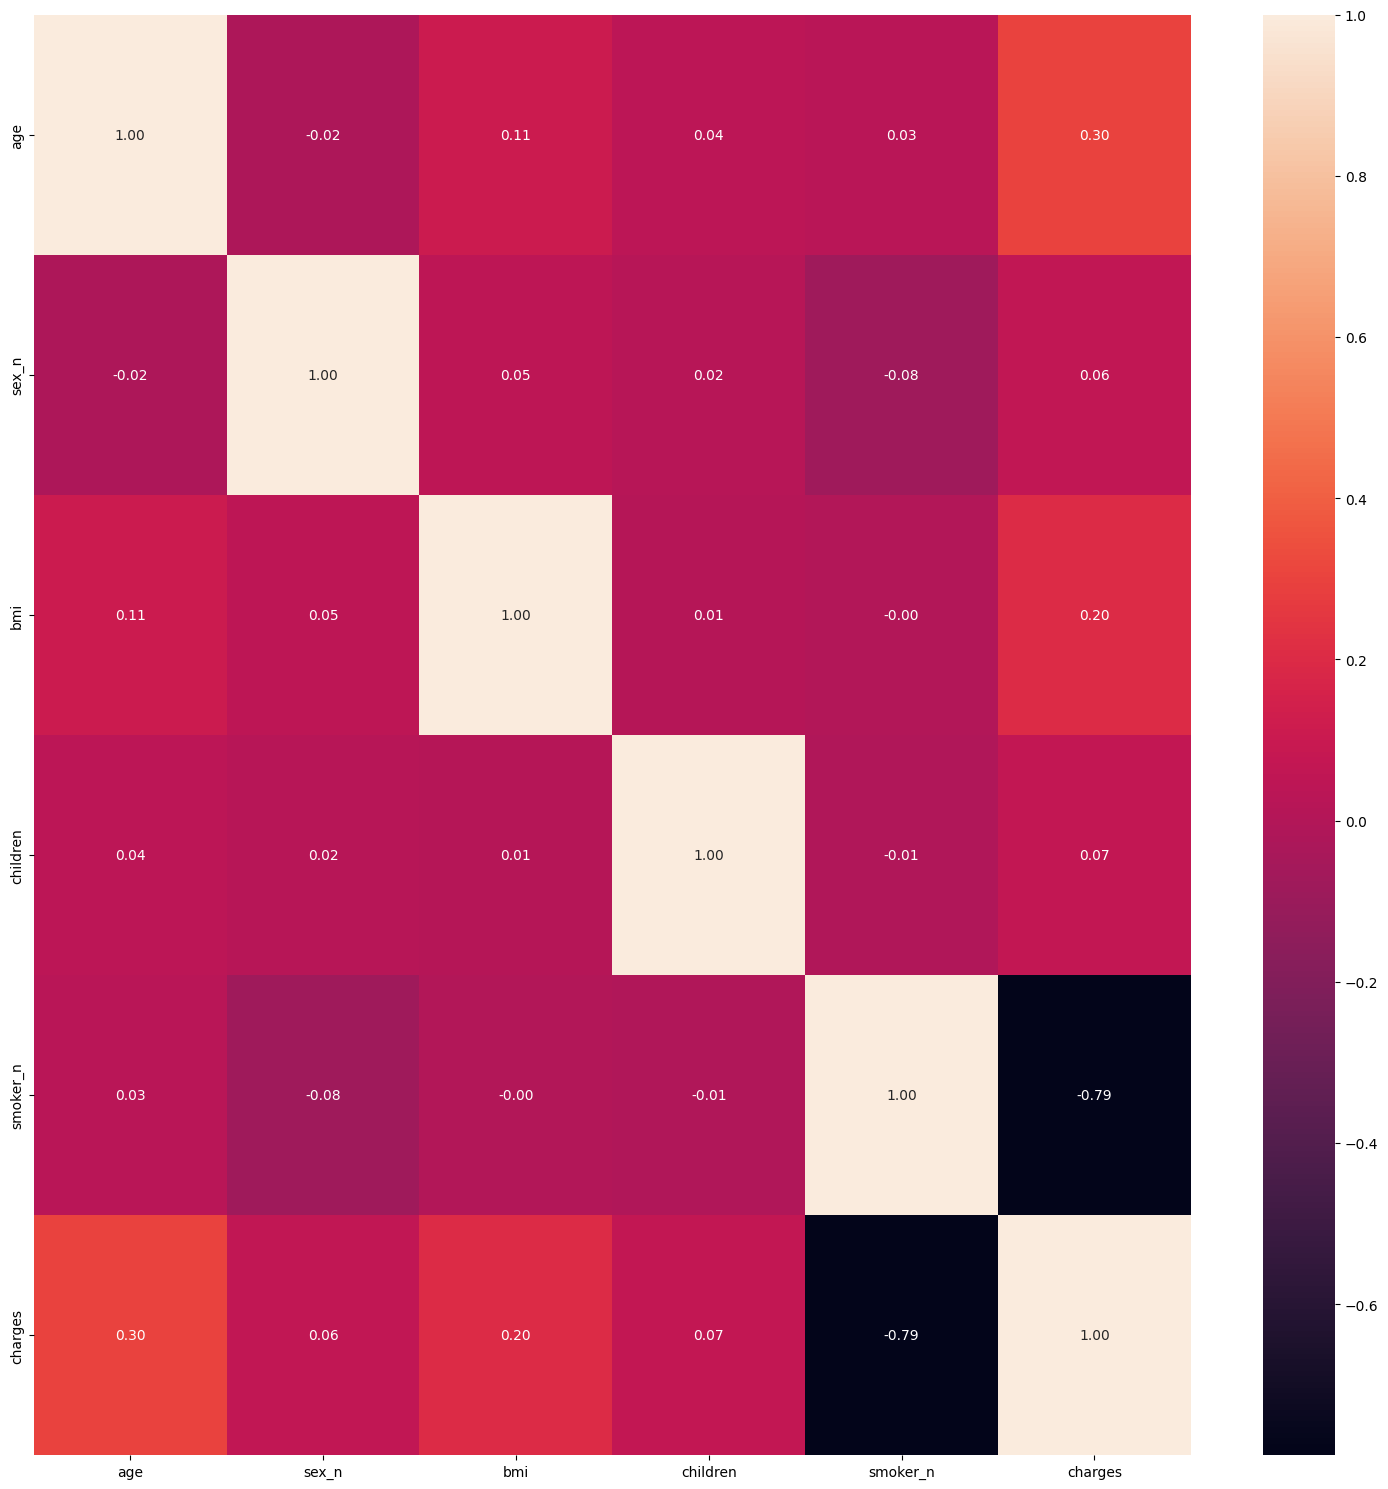

In [71]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["age", "sex_n", "bmi", "children", "smoker_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

There is a negative relation between smoker_n and charges

All Data Analysis

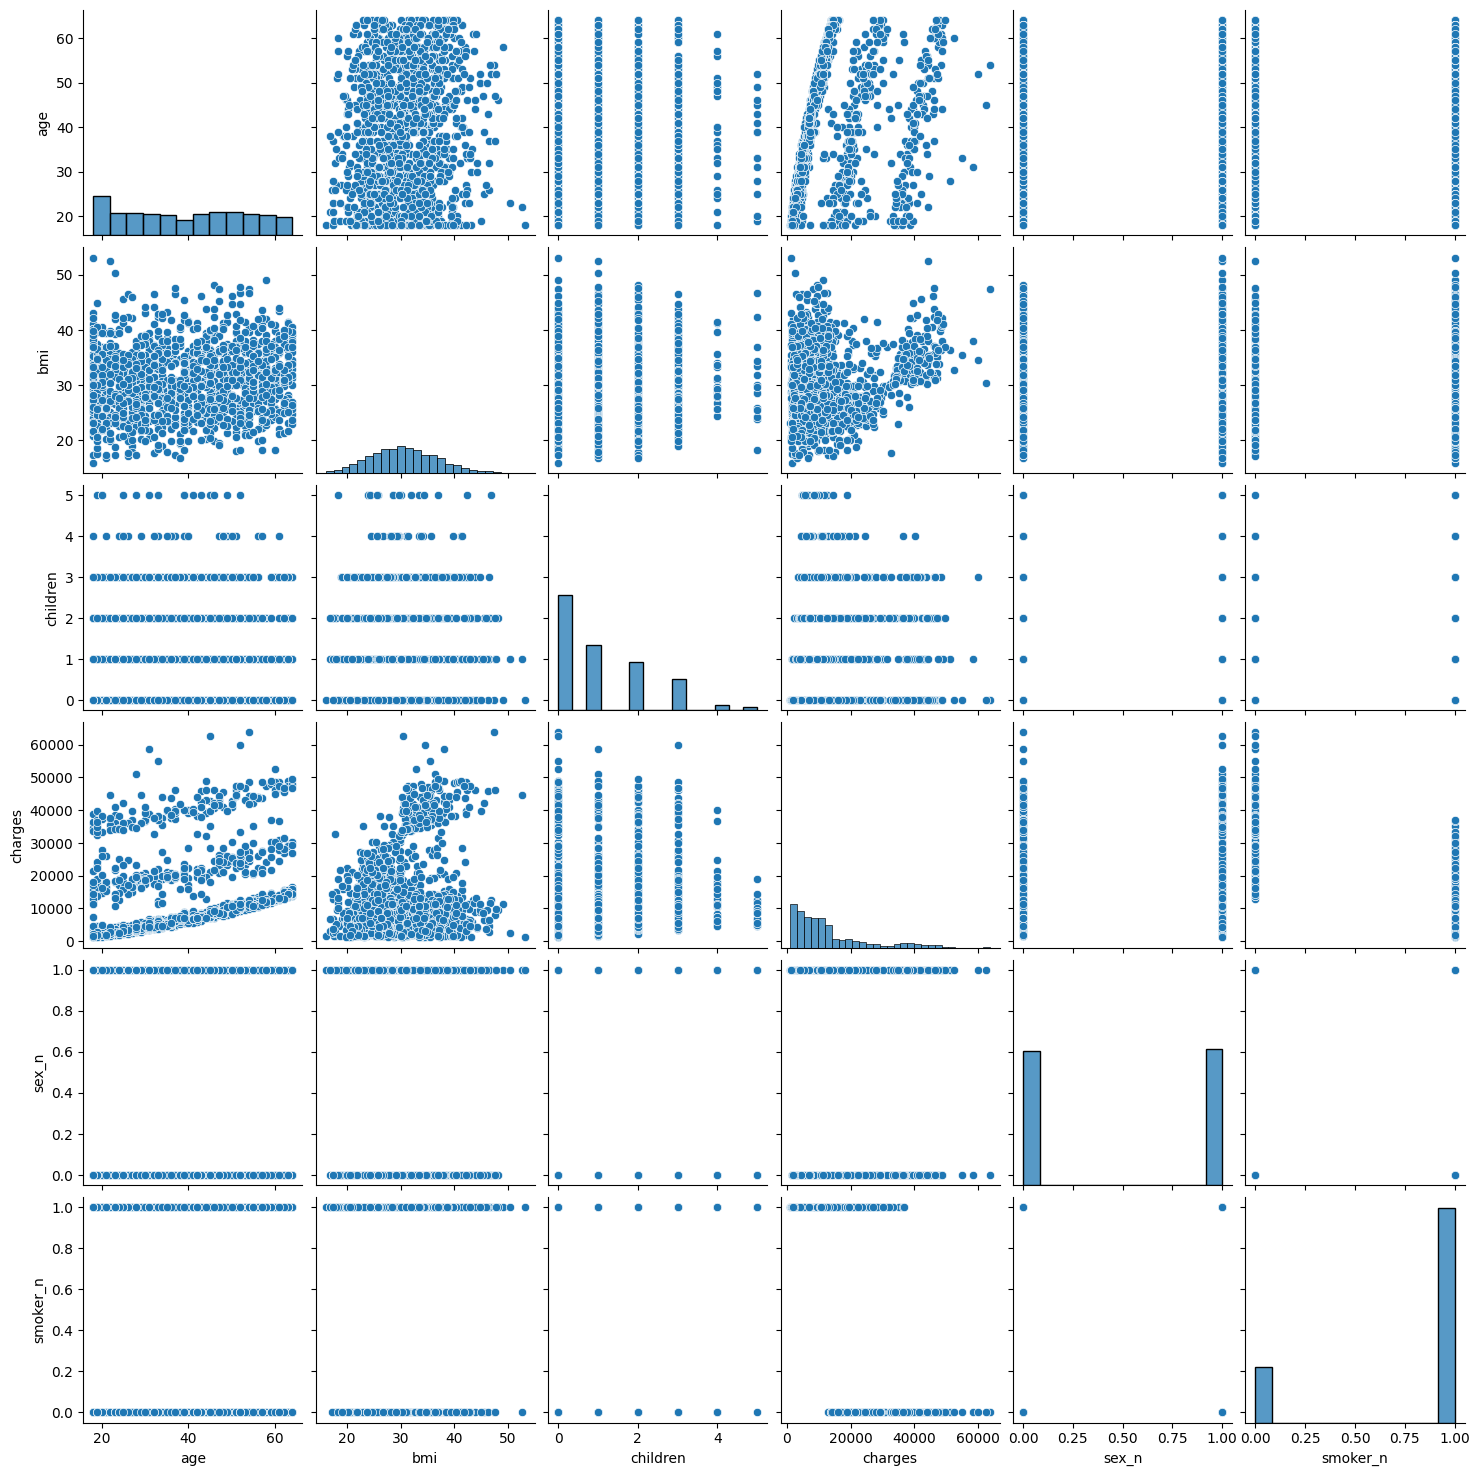

In [72]:
sns.pairplot(data = total_data)

Feature Engineering

Outlier Analysis

In [73]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


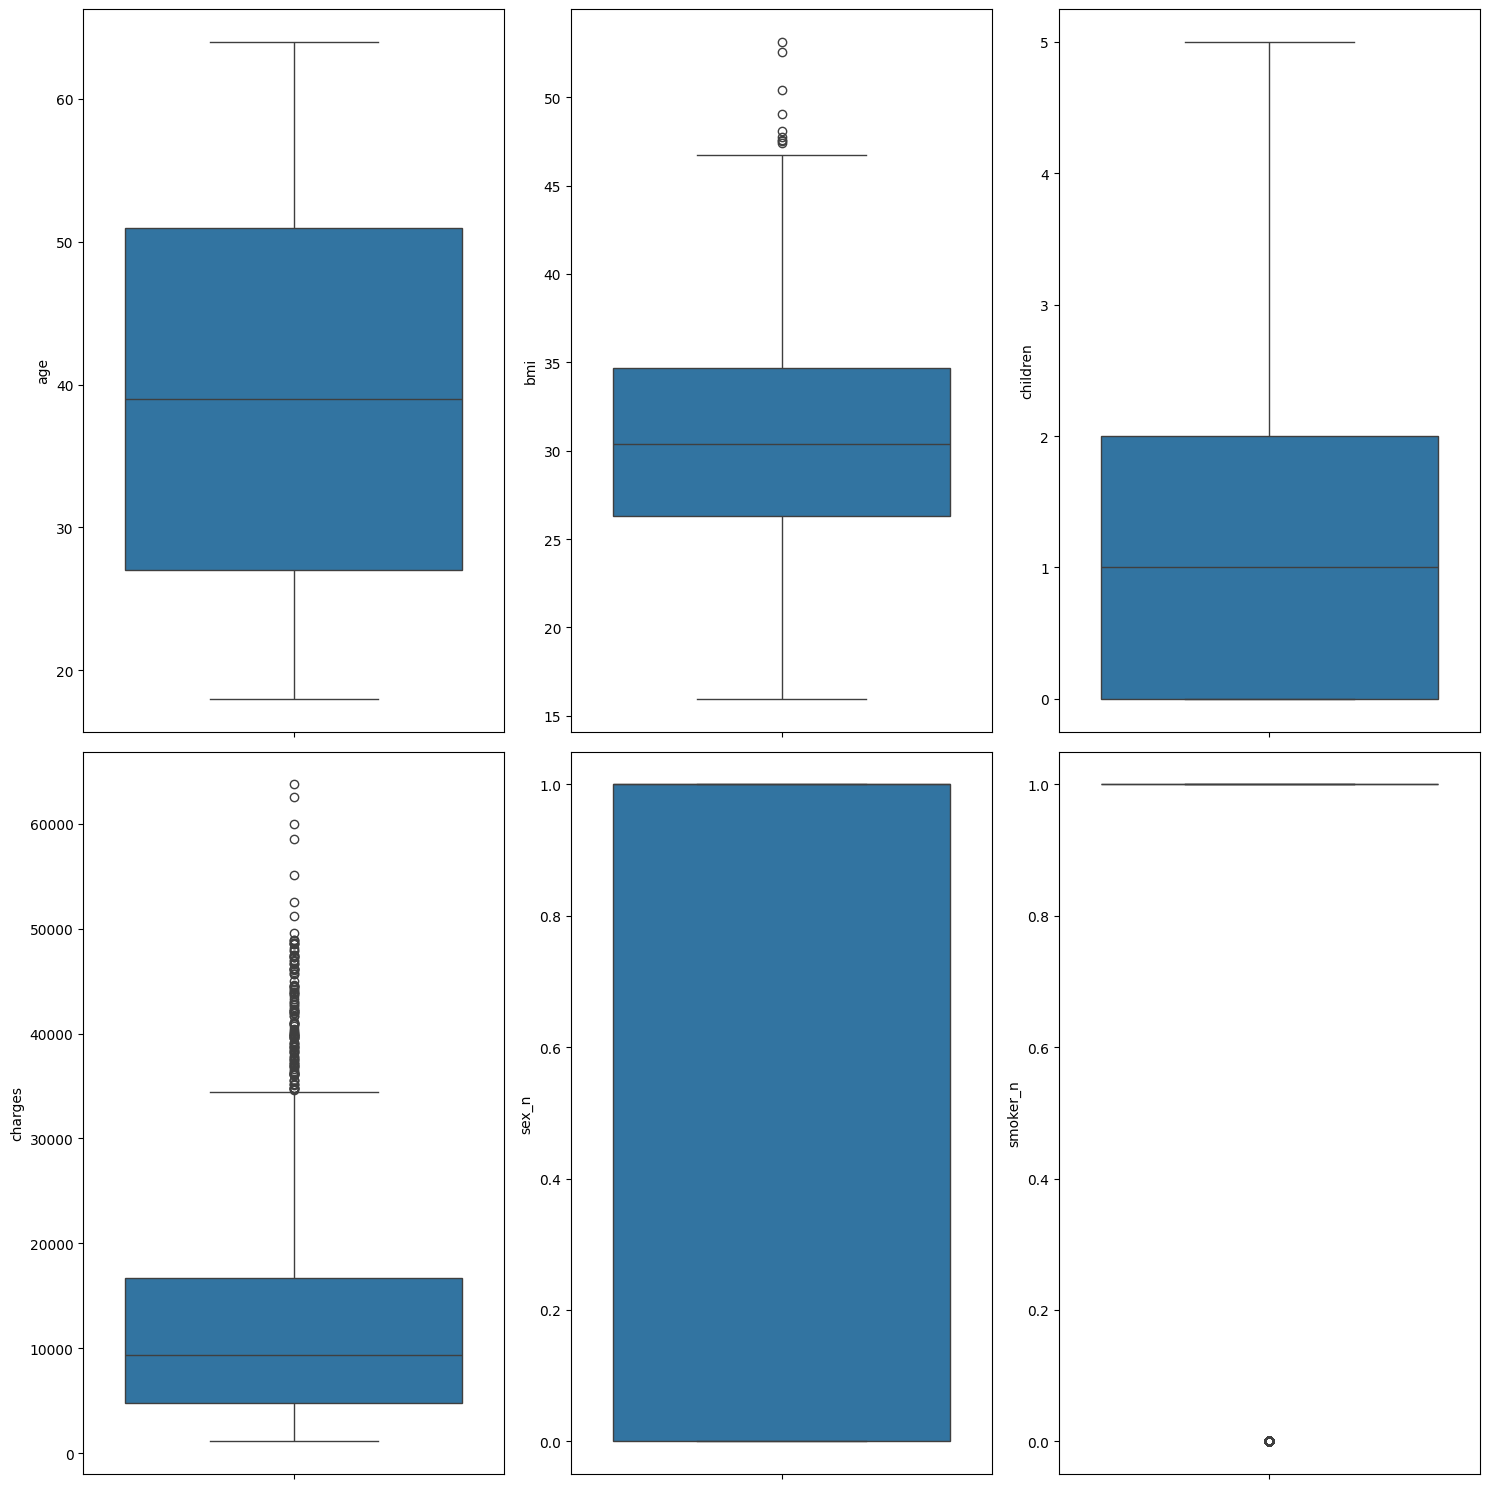

In [74]:
fig, axes = plt.subplots(2, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "children")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "charges")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "sex_n")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "smoker_n")

plt.tight_layout()
plt.show()

Outlier dectection for the variable "charges"

In [75]:
charges_statistics = total_data["charges"].describe()
charges_statistics

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [76]:
charges_iqr = charges_statistics["75%"] - charges_statistics["25%"]
upper_limit = charges_statistics["75%"] + 1.5 * charges_iqr
lower_limit = charges_statistics["25%"] - 1.5 * charges_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(charges_iqr, 2)}")

The upper limit for finding outliers is 34524.78 and the lower limit is -13120.72, with an interquartile range of 11911.37


In [77]:
total_data = total_data[(total_data["charges"] < upper_limit) & (total_data["charges"] > lower_limit)]
print("New data:", len(total_data))


New data: 1198


In [78]:
bmi_statistics = total_data["bmi"].describe()
bmi_statistics

count    1198.000000
mean       30.094787
std         6.013044
min        15.960000
25%        25.800000
50%        29.735000
75%        33.820000
max        53.130000
Name: bmi, dtype: float64

In [79]:
bmi_iqr = bmi_statistics["75%"] - bmi_statistics["25%"]
upper_limit = bmi_statistics["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_statistics["25%"] - 1.5 * bmi_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper limit for finding outliers is 45.85 and the lower limit is 13.77, with an interquartile range of 8.02


In [80]:
total_data = total_data[(total_data["bmi"] < upper_limit) & (total_data["bmi"] > lower_limit)]
print("New data:", len(total_data))

New data: 1185


We can se that the size of the data frame change now that we deleted the outlier data.

Missing Values Analysis

In [81]:
total_data.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

Feature Scaling

In [82]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "sex_n", "bmi", "children","smoker_n"]


X = total_data[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,age,sex_n,bmi,children,smoker_n
1089,56,1,22.100,0,1
344,49,0,41.470,4,1
801,64,0,35.970,0,1
743,31,0,26.620,0,1
316,50,1,32.205,0,1


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,age,sex_n,bmi,children,smoker_n
1089,1.221710,1.029985,-1.335724,-0.882566,0.364165
344,0.724758,-0.970888,2.007573,2.379315,0.364165
801,1.789654,-0.970888,1.058263,-0.882566,0.364165
743,-0.553117,-0.970888,-0.555564,-0.882566,0.364165
316,0.795751,1.029985,0.408417,-0.882566,0.364165


Given the few variables we have and that we consider that they are relevant, we do not need to apply the feature selection

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,sex_n,bmi,children,smoker_n
1089,0.826087,1.0,0.208347,0.0,1.0
344,0.673913,0.0,0.865626,0.8,1.0
801,1.000000,0.0,0.678996,0.0,1.0
743,0.282609,0.0,0.361724,0.0,1.0
316,0.695652,1.0,0.551239,0.0,1.0


In [85]:
X_train.head()

,age,sex_n,bmi,children,smoker_n
1089,56,1,22.100,0,1
344,49,0,41.470,4,1
801,64,0,35.970,0,1
743,31,0,26.620,0,1
316,50,1,32.205,0,1


In [86]:
X_test.head()

,age,sex_n,bmi,children,smoker_n
365,49,0,30.78,1,1
1079,63,1,33.66,3,1
1334,18,0,31.92,0,1
101,30,1,25.46,0,1
1119,30,0,19.95,3,1


In [87]:
X_train["charges"] = list(y_train)
X_test["charges"] = list(y_test)
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)

Linear Regresion Model

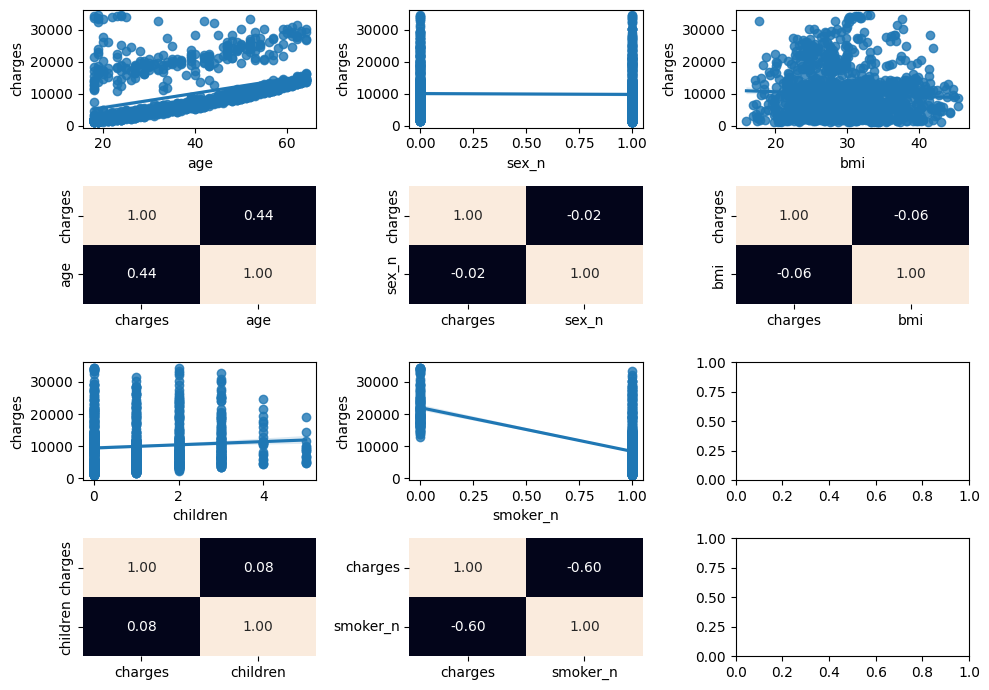

In [88]:
fig, axis = plt.subplots(4, 3, figsize = (10, 7))
total_data = pd.concat([X_train, X_test])

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "sex_n", y = "charges")
sns.heatmap(total_data[["charges", "sex_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)
plt.tight_layout()

plt.show()

Start Training Model

In [89]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Defining parameters 

In [90]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coeficients (b1, b2, b3, b4, b5): {model.coef_}")

Intercept (a): -3.637978807091713e-12
Coeficients (b1, b2, b3, b4, b5): [-5.43792139e-15  2.36044517e-12 -2.97585849e-14  3.31793381e-14
  5.42079658e-12  1.00000000e+00]


Prediction model

In [92]:
pred = model.predict(X_test)
pred

array([ 9778.3472 , 15161.5344 ,  2205.9808 ,  3645.0894 ,  5693.4305 ,
        8413.46305, 22478.6    ,  5757.41345,  3481.868  , 19594.80965,
        1986.9334 , 13126.67745, 24535.69855,  1815.8759 ,  2150.469  ,
       12044.342  ,  9722.7695 , 11938.25595, 10702.6424 , 17128.42608,
        5836.5204 , 12646.207  , 16069.08475, 19515.5416 ,  7209.4918 ,
       13217.0945 , 18608.262  ,  5484.4673 ,  4883.866  ,  9290.1395 ,
        2643.2685 , 17663.1442 ,  3925.7582 , 27000.98473, 14349.8544 ,
       14451.83515,  9487.6442 ,  8233.0975 , 13822.803  ,  1622.1885 ,
        6548.19505, 12609.88702, 11363.2832 , 30063.58055,  2741.948  ,
        8606.2174 ,  3659.346  , 11512.405  ,  7935.29115,  1136.3994 ,
        9877.6077 ,  8410.04685,  9249.4952 , 11735.87905, 12333.828  ,
       13616.3586 ,  5699.8375 , 17878.90068,  1743.214  ,  7626.993  ,
       24106.91255,  6389.37785, 11945.1327 ,  8428.0693 ,  1769.53165,
        1708.92575, 10965.446  ,  3176.2877 ,  1131.5066 ,  1748

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, pred)}")
print(f"Coefficient of determination: {r2_score(y_test, pred)}")

Mean squared error: 1.2385677215228997e-23
Coefficient of determination: 1.0


We can see that the coefficient of determination is 1, meaning that is adjusted exactly to the model.

In [94]:
import math
math.sqrt(mean_squared_error(y_test, pred))

3.5193290859521787e-12

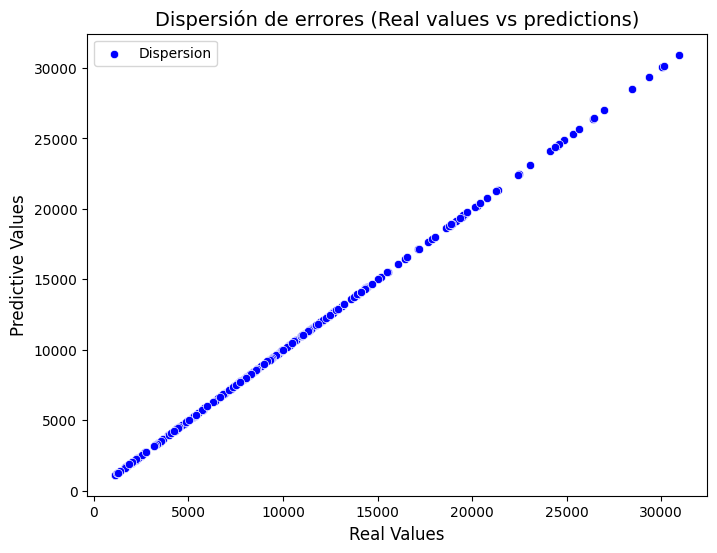

In [95]:
## Error Dispersion
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=pred, color='blue', label='Dispersion')
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predictive Values', fontsize=12)
plt.title('Dispersión de errores (Real values vs predictions)', fontsize=14);

We can see that the pred values and the real values are align, meaning that the linear regression model is pretty good.